Homework 1 - Diagnostic
==============

Due April 4, 2017 
==========

By Zhuo Leng
==========




Problem 1: Data Acquisition and Analysis
-----

In [5]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

1. You should download and combine data from the open data portal for the past year about the following 311 requests

(I choose not to combine the four dataset after I seeing the piazza)

In [6]:
##import data
graffiti = pd.read_csv('Graffiti_Removal.csv')

pot = pd.read_csv('Pot_Holes_reported.csv', names =['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'Type of Service Request', 'Current Activity',
       'Most Recent Action', 'Number of Potholes Filled On Block', 'Street Address', 'ZIP Code',
       'X Coordinate', 'Y Coordinate', 'Ward', 'Police District',
       'Community Area', 'SSA', 'Latitude', 'Longitude', 'Location'], skiprows = [0])

sanitation = pd.read_csv('Sanitation_Code_Complaints.csv', skiprows = [1])

vacant = pd.read_csv('Vacant_and_Abandoned_Buildings_Reported.csv',
        names = ['Type of Service Request', 'Service Request Number', 'Creation Date',
       'Location of Building on the lot', 'Is the Building Dangerous or Hazarous?',
       'Is Building Open Or Board?', 'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?',
       'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?', 'IS THE BUILDING VACANT DUE TO FIRE?',
       'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)', 
       'ADDRESS STREET NUMBER', 'ADDRESS STREET DIRECTION',
       'ADDRESS STREET NAME', 'ADDRESS STREET SUFFIX', 'ZIP Code',
       'X Coordinate', 'Y Coordinate', 'Ward', 'Police District',
       'Community Area', 'Latitude', 'Longitude', 'Location'], skiprows = [0,1])

2.Generate summary statistics for these requests including but not limited to number of requests of each type (and subtype within each of the types above) over time, by neighborhood, response time by the city. Please use a combination of tables and graphs to present these summary stats.

In [7]:
#Help function (1)

#### figure and table of total number of request by the four different 311 requests
def main_type_by_year():
	'''
	Input a datafram(string format) and get the summary statistics and the bar chat plot for this main type
	311 request from year 2011 to 2016

	Input:
	'graffiti' or 'pot' or 'sanitation'

	Output:
	summary statistics of certain types 311 request by years(2011-2016) under input df types

	'''

	graffiti['year'] = graffiti['Creation Date'].apply(lambda x: x[-4:])
	grouped_graffiti = (graffiti.groupby('year').size())
	#only get the amount from 2011 to 2016
	amount_graffiti = grouped_graffiti[-7:-1]


	pot['year'] = pot['Creation Date'].apply(lambda x: x[-4:])
	grouped_pot = pot.groupby('year').size()
	#only get the amount from 2011 to 2016
	amount_pot = grouped_pot[-7:-1]

	sanitation['year'] = sanitation['Creation Date'].apply(lambda x: x[-4:])
	grouped_sanitation = sanitation.groupby('year').size()
	#only get the amount from 2011 to 2016
	amount_sanitation = grouped_sanitation[-7:-1]


	vacant['year'] = vacant['Creation Date'].apply(lambda x: x[-4:])
	grouped_vacant = vacant.groupby('year').size()
	#only get the amount from 2011 to 2016
	amount_vacant = grouped_vacant[-7:-1]

	df =  pd.concat([amount_graffiti, amount_pot, amount_sanitation, amount_vacant],axis=1)
	df = df.rename(index=str, columns={0: "amount_graffiti", 1: "amount_pot", 2: 'amount_sanitation', 3: 'amount_vacant'})

	##plot
	fig, ax = plt.subplots(figsize =(8,8))
	plt.plot(df.index, df.amount_graffiti, marker = 'D',label = 'amount of graffiti removal request')
	plt.plot(df.index, df.amount_pot, marker = 'o',label = 'amount of pot hole request')
	plt.plot(df.index, df.amount_sanitation, marker ='o', color = 'b',label = 'amount of sanitation request')
	plt.plot(df.index, df.amount_vacant, marker = 'D', color = 'maroon',label = 'amount of vacant request')

	plt.title('311 requests amounts from 2011 to 2016', fontsize=20)
	plt.xlabel(r'year')
	plt.ylabel(r'amount of 311 request')
	plt.legend(loc='upper right')

	plt.show()
	plt.close()

	return df


In [8]:
#Help function(2-3)


#number of requests of subtypes function
def subtype_request(df):
	'''
	Input a datafram(string format) and get the summary statistics and the bar chat plot of each subtypes 
	under this main type.

	Input:
	'graffiti' or 'pot' or 'sanitation'

	Output:

	summary statistics of each types under the input datafram
	'''
	total = len(df)
	if df == 'graffiti':
		grouped_1 = graffiti.groupby('What Type of Surface is the Graffiti on?').size().order(ascending=False).head(5)
		grouped_2 = graffiti.groupby('Where is the Graffiti located?').size().order(ascending=False).head(5)
		grouped_3 = graffiti.groupby('Community Area').size().order(ascending=False).head(5)
		grouped_4 = graffiti.groupby('response time(days)').size().order(ascending=False).head(5)

	elif df == 'pot':
		grouped_1 = pot.groupby('Current Activity').size().order(ascending=False).head(5)
		grouped_2 = pot.groupby('Number of Potholes Filled On Block').size().order(ascending=False).head(5)
		grouped_3 = pot.groupby('Community Area').size().order(ascending=False).head(5)
		grouped_4 = pot.groupby('response time(days)').size().order(ascending=False).head(5)
	elif df == 'sanitation':
		grouped_1 = sanitation.groupby('What is the Nature of this Code Violation?').size().order(ascending=False).head(5)
		grouped_2 = sanitation.groupby('Status').size().order(ascending=False).head(5)
		grouped_3 = sanitation.groupby('Community Area').size().order(ascending=False).head(5)
		grouped_4 = sanitation.groupby('response time(days)').size().order(ascending=False).head(5)

	fig = plt.figure(figsize = (10,10))

	ax1 = fig.add_subplot(2, 2, 1)
	ax1.title.set_text('{}'.format(grouped_1.index.name))
	grouped_1.plot(kind = 'bar')

	ax2 = fig.add_subplot(2, 2, 2)
	ax2.title.set_text('{}'.format(grouped_2.index.name))
	grouped_2.plot(kind = 'bar')

	ax3 = fig.add_subplot(2, 2, 3)
	ax3.title.set_text('{}'.format(grouped_3.index.name))
	grouped_3.plot(kind = 'bar')

	ax4 = fig.add_subplot(2, 2, 4)
	ax4.title.set_text('{}'.format(grouped_4.index.name))
	grouped_4.plot(kind = 'bar')
	plt.show()
	plt.close()

	return grouped_1, grouped_2, grouped_3, grouped_4



##response time function
def response_time(df):
    '''
    Input a dataframe and add columns of response time(days) depends on completion date and
    creation date. If the one of the date of creation or completion is nan, the response time 
    will be default -1

    Input:
    dataframe
    '''
    date_format = "%m/%d/%Y"

    lst_completion = []
    for i in df['Completion Date']:
        if isinstance(i, str):
            dt = datetime.strptime(i, date_format)
        else:
            dt = np.nan
        lst_completion.append(dt)

    lst_creation = []
    for i in df['Creation Date']:
        if isinstance(i, str):
            dt = datetime.strptime(i, date_format)
        else:
            dt = np.nan
        lst_creation.append(dt)

    days = np.zeros(len(lst_completion))
    for i in range(len(lst_completion)):
        if isinstance(lst_completion[i], float) or isinstance(lst_creation[i], float):
            days[i] = -1
        else:
            days[i] = (lst_completion[i] - lst_creation[i]).days
    
    df['response time(days)'] = days
    return


In [9]:
##update the three dataframe with response time
response_time(graffiti)
response_time(pot)
response_time(sanitation)

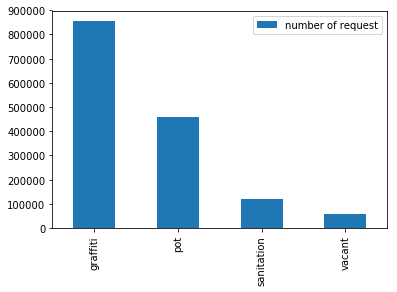

In [10]:
## figure and table of total number of request by the four different 311 requests
fig = plt.figure()
dic_total_request = {'graffiti':len(graffiti), 'pot':len(pot), 'sanitation':len(sanitation), 'vacant':len(vacant)}
df_total_request = pd.Series(dic_total_request).to_frame('number of request')
df_total_request.plot(kind = 'bar')
plt.show()

In [11]:
#table form
df_total_request

,number of request
graffiti,855697
pot,458469
sanitation,118923
vacant,58745


From the table and bar chart plot of the four types of 311 request, we could know that the graffiti requests' number is the largest over time, which is equal to 855697. The vacant requests' number is the smallest, which equal to 58745.However, this result come from the data which has not groupby a constant time, so it's not that representative. So next, we will only focus on the 2011- 2016 311 requests of this four types. 

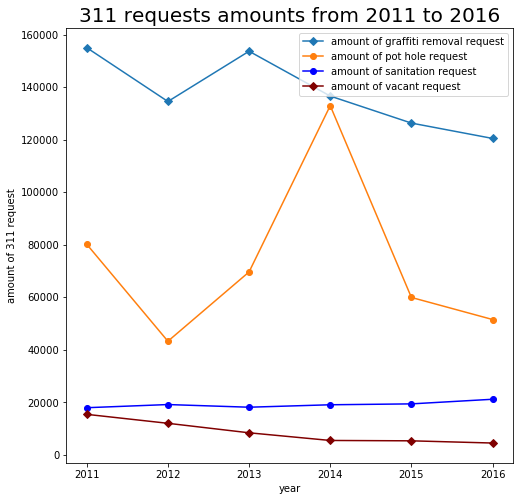

In [14]:
df = main_type_by_year()

In [15]:
df

,amount_graffiti,amount_pot,amount_sanitation,amount_vacant
year,,,,
2011,155019,80162,17922,15395
2012,134529,43237,19124,11984
2013,153669,69630,18112,8370
2014,136595,132938,19042,5451
2015,126310,59910,19382,5313
2016,120461,51507,21139,4472


From the table we could notice that the 311 requests of different year show different pattern. Take a look at the line plot above, graffiti removel requests and vacant request are roughly decrease from 2011 to 2016. After group by year, the yearly number of graffiti removel 311 requests is also the largest one, number of vacant request is still the smallest. Amount of sanitation request seems not change a lot in different year. However, pot hole request increased sharply in 2014, although it still smaller than graffiti removel request.

/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: order is deprecated, use sort_values(...)


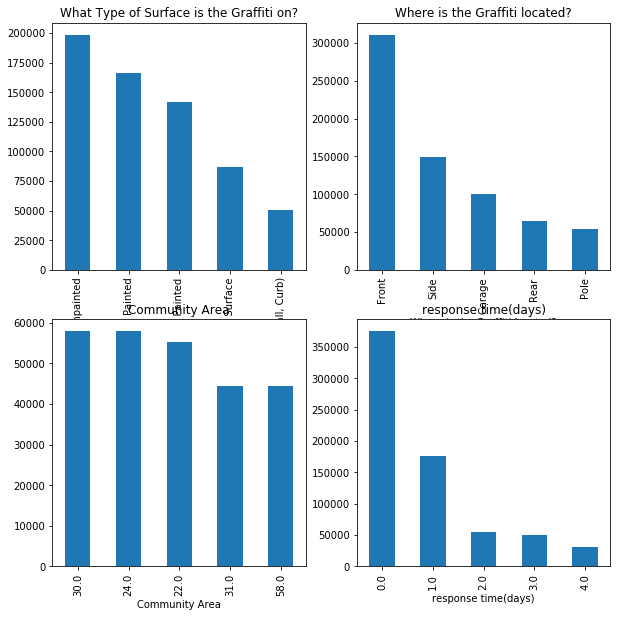

In [16]:
##number of request in each subtypes including response time
#graffiti subtype
graffiti_summary = subtype_request('graffiti')

In [17]:
graffiti_summary[0].to_frame('top 5 amount')

,top 5 amount
What Type of Surface is the Graffiti on?,
Brick - Unpainted,198685
Brick - Painted,166048
Metal - Painted,142147
Other / Unknown Surface,87059
"Cement (Sidewalk, Alley, Wall, Curb)",50464


In [18]:
graffiti_summary[1].to_frame('top 5 amount')

,top 5 amount
Where is the Graffiti located?,
Front,310846
Side,148707
Garage,100115
Rear,64015
Pole,54621


In [19]:
graffiti_summary[2].to_frame('top 5 amount')

,top 5 amount
Community Area,
30.0,57906
24.0,57892
22.0,55115
31.0,44366
58.0,44281


In [20]:
graffiti_summary[3].to_frame('top 5 amount')

,top 5 amount
response time(days),
0.0,375372
1.0,176554
2.0,55248
3.0,50379
4.0,31064


From the plot and table, we could know that the top 5 amount of type of surface is the graffiti on from 311 graffiti removal data is as above. Most request about graffiti removel is brick-unpainted and brick painted, which means brick is the most usual graffiti area. Most graffiti located in the front and it's amount much larger than other kind of location. This mean front brick is always unprotectable. 

In terms of community area, the graffiti removal requests do not have much difference. 30 community area has the most graffiti, 57906. 

Take a look at the response time(days), most graffiti removel requests will complete the task the day that it has been request. 

/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:25: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: FutureWarning: order is deprecated, use sort_values(...)


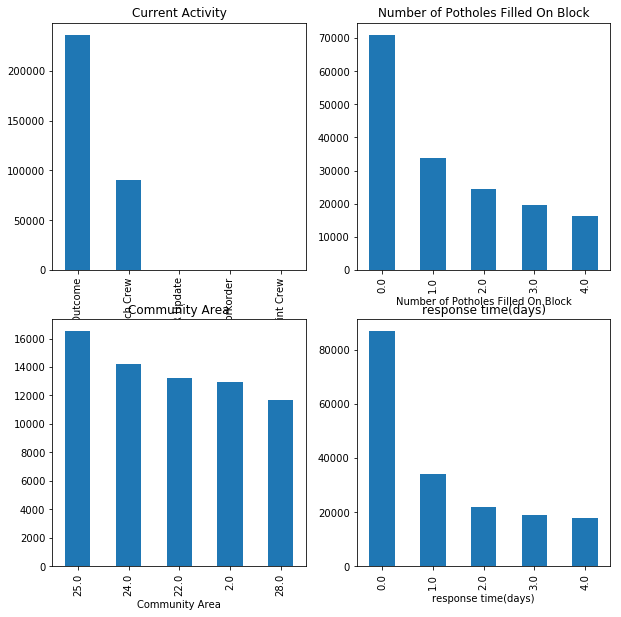

In [21]:
sub_pot = subtype_request('pot')

In [22]:
sub_pot[0].to_frame('top 5 amount')

,top 5 amount
Current Activity,
Final Outcome,236378
Dispatch Crew,90117
Follow-on SR Update,324
Generate Workorder,188
Complaint Crew,26


In [23]:
sub_pot[1].to_frame('top 5 amount')

,top 5 amount
Number of Potholes Filled On Block,
0.0,71044
1.0,33665
2.0,24415
3.0,19601
4.0,16343


In [24]:
sub_pot[2].to_frame('top 5 amount')

,top 5 amount
Community Area,
25.0,16521
24.0,14232
22.0,13228
2.0,12965
28.0,11713


In [25]:
sub_pot[3].to_frame('top 5 amount')

,top 5 amount
response time(days),
0.0,86909
1.0,34118
2.0,22017
3.0,19031
4.0,17908


From the plot and table, we could know that the top 5 amount of current activity from 311 potholes data is as above. Most request current activity of potholes request is Final Outcome and Dispatch Crew. Most pot holes don't have hole filled on block. 

In terms of community area, the pot holes requests have slightly difference compared with graffiti requests. 25 community area has the most pot hole requests, 16521. The 24 community area has 14232 pot hole requests and 57892 graffiti requests, rank 2nd in both graffiti removel request and pot holes request.

Take a look at the response time(days), most pot holes requests will complete the task the day that it has been request. 

/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:31: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: order is deprecated, use sort_values(...)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:33: FutureWarning: order is deprecated, use sort_values(...)


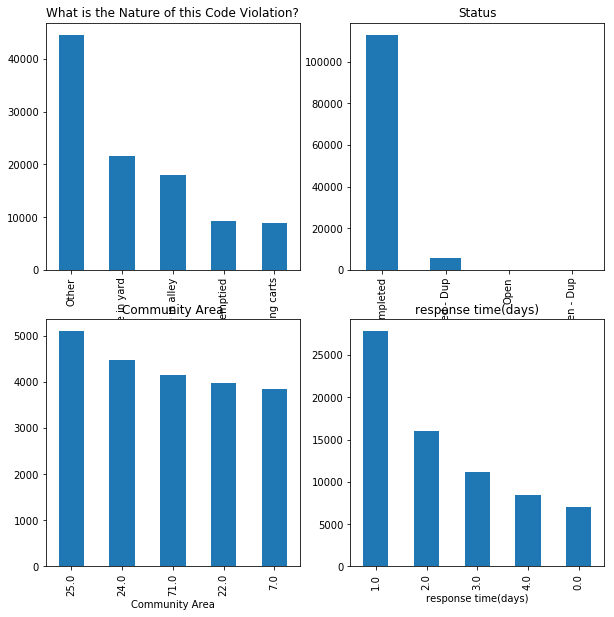

In [26]:
sub_sanitation = subtype_request('sanitation')

In [27]:
sub_sanitation[0].to_frame('top 5 amount')

,top 5 amount
What is the Nature of this Code Violation?,
Other,44595
Garbage in yard,21556
Garbage in alley,18034
Dumpster not being emptied,9221
Overflowing carts,8942


In [28]:
sub_sanitation[1].to_frame('top 5 amount')

,top 5 amount
Status,
Completed,112974
Completed - Dup,5658
Open,172
Open - Dup,119


In [29]:
sub_sanitation[2].to_frame('top 5 amount')

,top 5 amount
Community Area,
25.0,5103
24.0,4476
71.0,4158
22.0,3971
7.0,3848


In [30]:
sub_sanitation[3].to_frame('top 5 amount')

,top 5 amount
response time(days),
1.0,27841
2.0,15990
3.0,11221
4.0,8491
0.0,7086


From the plot and table, we could know that the top 5 amount of types of nature violation from 311 sanitation data is as above. Most request can not get a accurate decision of the nature of violation, so their category is under OTHER. 

In terms of community area, the 25, 24 22 community areas are in the top 5 amount list again. These community areas are also in the pot holes requests top 5 community acres request list. community areas 7 and 71 are the first time show here.


Take a look at the response time(days), most sanitation requests will complete the task the day after it has been request. Compare to the graffiti removel request and pot hole request, sanitation request takes longer time to response.

Problem 2: Data Augmentation and APIs
-----

In [37]:
##help function to get census api

def get_census(dataframe):
	'''
	Use lat and lon of dataframe to get fips number and use fips number to make a call to get
    census api

	Input: dataframe

	Output: dataframe
	'''

	df = dataframe[(dataframe['year'] == '2017')].reset_index(drop = True)
	df = df.dropna(subset = [['Latitude','Longitude']]).reset_index(drop = True)

	lat = df['Latitude']
	lon = df['Longitude']

	B01001F_001E = []
	B19119_001E = []
	B05010_001E = []

	for i in range(len(lat)):

		#first use lat and lon to get fips data
		api_url = 'http://data.fcc.gov/api/block/find?format=json&latitude={}&longitude={}&showall=true'.format(lat[i], lon[i])
		r = requests.get(api_url)
		soup = bs4.BeautifulSoup(r.text, 'lxml') 
		fips = json.loads(soup.text)

		state = fips['State']['FIPS']
		county = fips['County']['FIPS'][2:]
		tract = fips['Block']['FIPS'][5:-4]
		block = fips['Block']['FIPS'][-4:]

		#then use fips data to call census api
		new_url = 'http://api.census.gov/data/2014/acs5?get=B01001F_001E,B19119_001E,B05010_001E&for=tract:{}&in=state:{}+county:{}&key=def7402f5045a06a516edc0f1e774d6155b11eb2'.format(tract, state, county)

		r = requests.get(new_url)
		soup = bs4.BeautifulSoup(r.text, 'lxml') 
		census = json.loads(soup.text)[1]

		B01001F_001E.append(census[0])
		B19119_001E.append(census[1])
		B05010_001E.append(census[2])

	df['B01001F_001E'] = B01001F_001E
	df['B19119_001E'] = B19119_001E
	df['B05010_001E'] = B05010_001E

	return df


In [39]:
import json
import sys
import csv
import json
import time 
import requests
import bs4



In [50]:

def get_census(dataframe):
	'''
	Use lat and lon of dataframe to get fips number and use fips number to make a call to get
    census api

	Input: dataframe

	Output: dataframe
	'''
	df = dataframe[(dataframe['year'] == '2017')].reset_index(drop = True)
	df = df.dropna(subset = [['Latitude','Longitude']]).reset_index(drop = True)

	lat = df['Latitude']
	lon = df['Longitude']

	B01001F_001E = []
	B19119_001E = []
	B05010_001E = []

	for i in range(len(lat)):

		#first use lat and lon to get fips data
		api_url = 'http://data.fcc.gov/api/block/find?format=json&latitude={}&longitude={}&showall=true'.format(lat[i], lon[i])
		r = requests.get(api_url)
		soup = bs4.BeautifulSoup(r.text, 'lxml') 
		fips = json.loads(soup.text)

		state = fips['State']['FIPS']
		county = fips['County']['FIPS'][2:]
		tract = fips['Block']['FIPS'][5:-4]
		block = fips['Block']['FIPS'][-4:]

		#then use fips data to call census api
		new_url = 'http://api.census.gov/data/2014/acs5?get=B01001F_001E,B19119_001E,B05010_001E&for=tract:{}&in=state:{}+county:{}&key=def7402f5045a06a516edc0f1e774d6155b11eb2'.format(tract, state, county)

		r = requests.get(new_url)
		soup = bs4.BeautifulSoup(r.text, 'lxml') 
		census = json.loads(soup.text)[1]

		B01001F_001E.append(census[0])
		B19119_001E.append(census[1])
		B05010_001E.append(census[2])

	df['B01001F_001E'] = B01001F_001E
	df['B19119_001E'] = B19119_001E
	df['B05010_001E'] = B05010_001E

	return df


In [52]:
census_sanitation = get_census(sanitation)
census_vacant = get_census(vacant)

In [51]:
census_sanitation

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What is the Nature of this Code Violation?,Street Address,ZIP Code,X Coordinate,Y Coordinate,...,Police District,Community Area,Latitude,Longitude,Location,response time(days),year,B01001F_001E,B19119_001E,B05010_001E
0,01/01/2017,Completed,01/02/2017,17-00004522,Sanitation Code Violation,Garbage in alley,5203 N RIVERSEDGE TER,60630.0,1.148197e+06,1.934265e+06,...,17.0,13.0,41.975572,-87.730404,"(41.97557220218336, -87.73040358326068)",1.0,2017,0,91250,353
1,01/03/2017,Completed - Dup,01/03/2017,17-00044149,Sanitation Code Violation,Garbage in alley,1310 N LA SALLE DR,60610.0,1.174892e+06,1.909097e+06,...,18.0,8.0,41.905952,-87.632992,"(41.905952444333785, -87.63299196329922)",0.0,2017,0,161431,307
2,01/03/2017,Completed - Dup,01/03/2017,17-00044193,Sanitation Code Violation,Garbage in yard,1310 N LA SALLE DR,60610.0,1.174892e+06,1.909097e+06,...,18.0,8.0,41.905952,-87.632992,"(41.905952444333785, -87.63299196329922)",0.0,2017,0,161431,307
3,01/03/2017,Completed - Dup,01/03/2017,17-00050708,Sanitation Code Violation,Dumpster not being emptied,4400 S DREXEL BLVD,60653.0,1.182932e+06,1.876025e+06,...,2.0,39.0,41.815017,-87.604490,"(41.81501736681795, -87.60448996218275)",0.0,2017,31,20417,908
4,01/03/2017,Completed,01/03/2017,17-00039892,Sanitation Code Violation,Dumpster not being emptied,74 W HARRISON ST,60605.0,1.175788e+06,1.897653e+06,...,1.0,32.0,41.874529,-87.630046,"(41.87452941248663, -87.63004641846015)",0.0,2017,111,124167,297
5,01/03/2017,Completed,01/03/2017,17-00050710,Sanitation Code Violation,NaN,4733 W FOSTER AVE,60630.0,1.143663e+06,1.934153e+06,...,17.0,14.0,41.975351,-87.747078,"(41.97535127582286, -87.74707804426303)",0.0,2017,0,91250,353
6,01/03/2017,Completed,01/03/2017,17-00051370,Sanitation Code Violation,Garbage in alley,1735 W DIVISION ST,60622.0,1.164475e+06,1.908042e+06,...,12.0,24.0,41.903284,-87.671287,"(41.903284055444104, -87.67128681093564)",0.0,2017,119,122656,970
7,01/03/2017,Completed,01/03/2017,17-00051528,Sanitation Code Violation,Garbage in alley,3129 W AUGUSTA BLVD,60622.0,1.155289e+06,1.906488e+06,...,12.0,23.0,41.899210,-87.705071,"(41.8992102351372, -87.70507125059116)",0.0,2017,901,36750,668
8,01/03/2017,Completed,01/03/2017,17-00052442,Sanitation Code Violation,Standing water,3000 N HOYNE AVE,60618.0,1.161829e+06,1.919910e+06,...,19.0,5.0,41.935907,-87.680675,"(41.9359070302739, -87.68067510138977)",0.0,2017,43,108011,387
9,01/01/2017,Completed - Dup,01/03/2017,17-00011372,Sanitation Code Violation,Overflowing carts,4048 N MOZART ST,60618.0,1.156658e+06,1.926773e+06,...,17.0,16.0,41.954846,-87.699491,"(41.9548460781068, -87.69949148880588)",2.0,2017,518,42269,847


In [53]:
census_vacant

,Type of Service Request,Service Request Number,Creation Date,Location of Building on the lot,Is the Building Dangerous or Hazarous?,Is Building Open Or Board?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",...,Ward,Police District,Community Area,Latitude,Longitude,Location,year,B01001F_001E,B19119_001E,B05010_001E
0,Vacant/Abandoned Building,17-00042635,01/03/2017,Front,NaN,Open,NaN,Vacant,False,False,...,27.0,12.0,27.0,41.882861,-87.699862,"(41.88286068279902, -87.6998616079848)",2017,50,29583,792
1,Vacant/Abandoned Building,17-00068420,01/04/2017,Front,NaN,Open,NaN,Vacant,False,False,...,21.0,6.0,71.0,41.748434,-87.642756,"(41.748433579115364, -87.6427562193056)",2017,0,24091,645
2,Vacant/Abandoned Building,17-00068968,01/04/2017,Front,NaN,Open,NaN,Vacant,False,False,...,6.0,6.0,71.0,41.752459,-87.641647,"(41.75245903397721, -87.64164653602171)",2017,0,7019,419
3,Vacant/Abandoned Building,17-00070421,01/04/2017,Front,NaN,Open,NaN,Vacant,False,False,...,6.0,7.0,68.0,41.763125,-87.650426,"(41.76312531420479, -87.65042567766548)",2017,0,27778,793
4,Vacant/Abandoned Building,17-00070425,01/04/2017,Front,NaN,Open,NaN,Vacant,False,False,...,20.0,3.0,42.0,41.779437,-87.607169,"(41.779436632580236, -87.60716897854888)",2017,11,24879,673
5,Vacant/Abandoned Building,17-00098413,01/06/2017,Front,NaN,Open,NaN,Vacant,False,False,...,20.0,7.0,68.0,41.780836,-87.635413,"(41.78083566084043, -87.63541282119954)",2017,14,26607,874
6,Vacant/Abandoned Building,17-00101874,01/06/2017,Front,NaN,Open,NaN,Vacant,True,False,...,26.0,25.0,20.0,41.918397,-87.726598,"(41.918397291772216, -87.72659828844799)",2017,2768,48686,795
7,Vacant/Abandoned Building,17-00017391,01/02/2017,Rear,NaN,Open,BACK DOOR,Vacant,False,True,...,37.0,15.0,25.0,41.891769,-87.756708,"(41.891769211507615, -87.75670784584048)",2017,78,38092,964
8,Vacant/Abandoned Building,17-00118792,01/07/2017,Front,NaN,Open,FRONT ENTRANCE DOOR OPEN,Vacant,False,False,...,16.0,7.0,68.0,41.784934,-87.653423,"(41.78493361032161, -87.6534231789828)",2017,0,20529,446
9,Vacant/Abandoned Building,17-00136514,01/09/2017,Front,NaN,Open,NaN,Vacant,True,False,...,15.0,9.0,61.0,41.806051,-87.675838,"(41.80605058523871, -87.67583839331903)",2017,962,34926,811


1. What types of blocks get “Sanitation Code Complaints”?

#B01001F_001E: RACE!!Total population
#B19119_001E : INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)
#B05010_001E: HOUSEHOLDS BY TYPE!!Total households!!Average family size

In [54]:
census_sanitation['B01001F_001E'].astype(float).describe()

count    4017.000000
mean      481.724421
std       803.206220
min         0.000000
25%        12.000000
50%       121.000000
75%       518.000000
max      4937.000000
Name: B01001F_001E, dtype: float64

In [55]:
census_sanitation['B19119_001E'].astype(float).describe()

count      4017.000000
mean      62764.394324
std       45731.757192
min        7019.000000
25%       33603.000000
50%       45625.000000
75%       72500.000000
max      250001.000000
Name: B19119_001E, dtype: float64

In [56]:
census_sanitation['B05010_001E'].astype(float).describe()


count    4017.000000
mean      874.692059
std       530.494858
min        22.000000
25%       462.000000
50%       756.000000
75%      1193.000000
max      2513.000000
Name: B05010_001E, dtype: float64

so from the describe data table, we could know that the the total population in Sanitation Code Complaints block are between(0, 4937). Most populaion of block is around 121(median), which is much larger than that in vacant reported block. Also, from the mean number of population = 481, we could testify that the vacant reported block has less population than sanitation complaints block. 

Then take a look at Median Family Income in the past 12 months. The median income is between (7019, 250001). The mean is 62764, compared to that of vacant (39391), the block has higher median family income in the past 12 month. However, the gap between rich and poor is much really larger around sanitation reported blocks. The std is almost two times of that of vacant report blocks.

Look at the description data of ratio of income to poverty level in the past 12 months of Children by Living Arrangements and Nativity of Parents. It's means own children under 18 years living in families or subfamilies for whom poverty status Is determined. Frome description data, we could know that the ratio is between (22,  2513), with mean = 874 and median = 756. This data does not seems much different between the two kinds of blocks.

2.What types of blocks get “Vacant and Abandoned Buildings Reported”?

In [57]:
census_vacant['B01001F_001E'].astype(float).describe()

count    1091.000000
mean      231.932172
std       585.782429
min         0.000000
25%         0.000000
50%        14.000000
75%       122.000000
max      4937.000000
Name: B01001F_001E, dtype: float64

In [58]:
census_vacant['B19119_001E'].astype(float).describe()


count      1091.000000
mean      39391.623281
std       21063.461079
min        7019.000000
25%       26375.000000
50%       34875.000000
75%       46053.000000
max      183889.000000
Name: B19119_001E, dtype: float64

In [59]:
census_vacant['B05010_001E'].astype(float).describe()


count    1091.000000
mean      838.350137
std       458.221576
min        37.000000
25%       514.000000
50%       717.000000
75%      1065.000000
max      2513.000000
Name: B05010_001E, dtype: float64

So from the describe data table, we could know that the the total population in vacant block are between(0, 4937). Most populaion of block is around 14(median). So we could know the std is very large in vacant area in terms of population

Then take a look at Median Family Income in the past 12 months. The median income is between (7019, 183889). The mean is 39391 and median is 34875. The gap between the rich and the poor is really huge around vacant block.

Look at the description data of ratio of income to poverty level in the past 12 months of Children by Living Arrangements and Nativity of Parents. It's means own children under 18 years living in families or subfamilies for whom poverty status Is determined. From description data, we could know that the ratio is between (37,  2513), with mean = 838 and median = 717. We could deduct that in vacant block the rich people are more than poor people.

3.Does that change over time in the data you collected?


In [62]:
census_sanitation['B01001F_001E'] = census_sanitation['B01001F_001E'].astype(float)
census_sanitation['B19119_001E'] = census_sanitation['B19119_001E'].astype(float)
census_sanitation['B05010_001E'] = census_sanitation['B05010_001E'].astype(float)

census_vacant['B01001F_001E'] = census_vacant['B01001F_001E'].astype(float)
census_vacant['B19119_001E'] = census_vacant['B19119_001E'].astype(float)
census_vacant['B05010_001E'] = census_vacant['B05010_001E'].astype(float)


In [63]:
#get the month data of each type of request
census_sanitation['month'] = census_sanitation['Creation Date'].apply(lambda x: x[:2])
census_vacant['month'] = census_vacant['Creation Date'].apply(lambda x: x[:2])

In [65]:
#groupby time
census_sanitation.groupby('month').mean()

,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,response time(days),B01001F_001E,B19119_001E,B05010_001E
month,,,,,,,,,,,,
01,60629.344007,1.162720e+06,1.889744e+06,23.798361,12.576230,36.045082,41.853096,-87.678284,4.495902,478.109016,63567.190984,846.845902
02,60629.790205,1.161818e+06,1.891876e+06,24.785819,12.932018,34.319444,41.858965,-87.681538,5.433480,512.453947,63040.355994,892.964181
03,60630.666900,1.161918e+06,1.891360e+06,24.709587,12.589923,35.037089,41.857546,-87.681185,3.246326,455.393282,61814.829951,880.973408


In [66]:
census_sanitation.groupby('month').median()

,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,response time(days),B01001F_001E,B19119_001E,B05010_001E
month,,,,,,,,,,,,
01,60626.0,1.162616e+06,1.896502e+06,25.0,12.0,29.0,41.871850,-87.678106,3.0,108.0,46404.0,742.0
02,60628.0,1.160967e+06,1.899278e+06,26.0,12.0,28.0,41.879479,-87.684830,3.0,124.0,46053.0,758.0
03,60628.0,1.160744e+06,1.898529e+06,26.0,11.0,28.0,41.877504,-87.685231,2.0,123.0,43966.0,758.0


I only use the recent three months' data. After I groupby month(01,02,03), I could know that although the B01001F index seems decrease after Jan.The median of population increase from Jan. In addition, the B19119_001E seems stable during Jan. and Feb.However, it drops from Mar., which means that the median family income decrease since Mar..At last, we look at B05010_001E, it does not has any pattern over time in the data I collected.

In [67]:
census_vacant.groupby('month').mean()

,Is the Building Dangerous or Hazarous?,ADDRESS STREET NUMBER,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,B01001F_001E,B19119_001E,B05010_001E
month,,,,,,,,,,,,,
01,NaN,5675.690678,60630.482906,1.172548e+06,1.861674e+06,16.697872,8.089362,50.365957,41.775856,-87.643046,272.813559,38250.661017,825.843220
02,NaN,5903.407125,60630.061224,1.170796e+06,1.863434e+06,18.175573,8.470738,51.045802,41.780725,-87.649421,200.012723,41039.323155,834.300254
03,NaN,5644.417749,60628.717724,1.169605e+06,1.863641e+06,19.212121,9.125541,50.025974,41.781321,-87.653779,238.201299,38572.837662,848.183983


In [68]:
census_vacant.groupby('month').median()

,Is the Building Dangerous or Hazarous?,ADDRESS STREET NUMBER,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,B01001F_001E,B19119_001E,B05010_001E
month,,,,,,,,,,,,,
01,NaN,6330.5,60624.0,1.173752e+06,1.857797e+06,16.0,7.0,50.0,41.765087,-87.638976,14.0,35568.0,673.0
02,NaN,6351.0,60628.0,1.171285e+06,1.857630e+06,17.0,7.0,51.0,41.764374,-87.648189,14.0,34875.0,701.0
03,NaN,6001.0,60628.0,1.171199e+06,1.858839e+06,17.0,7.0,51.0,41.768143,-87.648277,13.0,33798.0,756.0


The vacant reported data does not has any pattern over time in the data I collected.

4.What is the difference in blocks that get “Vacant and Abandoned Buildings Reported” vs “Sanitation Code Complaints”?


Just as I write in the second question. There are mainly two different in blocks that get “Vacant and Abandoned Buildings Reported” vs “Sanitation Code Complaints”?
First, the vacant reported block has less population than sanitation complaints block. 
Second: the vacant reported blocks are more poor than sanitation complaints block.

Problem 3: Data Augmentation and APIs
-----

1.Of the four types of requests you have data for, which request type is the most likely given the call came from 7500 S Wolcott Ave? What are the probabilities for each type of request?

In [69]:
# question 1
address = '7500 S Wolcott Ave'

#From the address, we could know that the zip code of address is 60620
count_graffiti = len(graffiti[graffiti['ZIP Code'] == 60620.0])
count_pot = len(pot[pot['ZIP Code'] == 60620.0])
count_sanitation = len(sanitation[sanitation['ZIP Code'] == 60620.0])
count_vacant = len(vacant[vacant['ZIP Code'] == 60620.0])

total = count_graffiti + count_pot + count_vacant + count_sanitation
p_graffiti = count_graffiti/total
p_pot = count_pot/total
p_sanitation = count_sanitation/total
p_vacant = count_vacant/total

In [71]:
p_graffiti

0.07493904297470283

In [72]:
p_pot


0.557375800060957

In [73]:
p_sanitation

0.22908412069491008

In [74]:
p_vacant

0.13860103626943004

The probability of each type of request is as above.

2.Let’s now assume that a call comes in about Graffiti Removal. Which is more likely – that the call came from Lawndale or Uptown? How much more or less likely is it to be from Lawndale versus Uptown?

In [75]:
#Because Lawndale is one of the community area of Chicago and it community area code is 30. Uptown's community
#area code is 03.
count_graffiti_law = len(graffiti[graffiti['Community Area'] == 30.0])
count_graffiti_up = len(graffiti[graffiti['Community Area'] == 03.0])

total = count_graffiti_up + count_graffiti_law
dif = count_graffiti_law/total - count_graffiti_up/total

In [77]:
count_graffiti_law

57906

In [78]:
count_graffiti_up


11913

In [79]:
dif


0.6587461865681261

The call for Graffiti Removal is more likely came from Lawndale. The probability that Lawndale is more likely is 0.6587461865681261

3.Now assume that you don’t have access to all the raw data and you know the following things:

There are a total of 1000 calls, 600 from Englewood and 400 from Uptown. Of the 600 calls from Englewood, 100 of them are about Graffiti Removal. Of the 400 calls from Uptown, 160 are about Graffiti Removal. If a call comes about Graffiti Removal, how much more/less likely is it that the call came from Englewood versus Uptown? 

In [80]:
p_eng = 100/600
p_uptown = 160/400
dif_2 = p_uptown - p_eng

In [81]:
dif_2

0.23333333333333336

There is 0.23333333333333336 less likely that the call came from Englewood versus Uptown